# Data Exploration

## Univariate Analysis
In mathematics, univariate refers to an expression, equation, function or polynomial of only one variable. “Uni” means “one”, so in other words your data has only one variable. So you do not need to deal with the causes or relationships in this step. Univariate analysis takes data, summarizes that variables (attributes) one by one and finds patterns in the data.

There are many ways that can describe patterns found in univariate data include central tendency (mean, mode and median) and dispersion: range, variance, maximum, minimum, quartiles (including the interquartile range), coefficient of variation and standard deviation. You also have several options for visualizing and describing data with univariate data. Such as frequency Distribution Tables, bar Charts, histograms, frequency Polygons, pie Charts.

The variable could be either categorical or numerical, I will demostrate the different statistical and visulization techniques to investigate each type of the variable.

### Numerical Variables

In [48]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession    
spark = SparkSession \
        .builder \
        .appName("Python Spark Data Exploration") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()

df = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').load("./data/GermanCredit.csv",header=True);

df.columns

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [49]:
df[['Account Balance','No of dependents']].toPandas().describe()

,Account Balance,No of dependents
count,1000.000000,1000.000000
mean,2.577000,1.155000
std,1.257638,0.362086
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,4.000000,1.000000
max,4.000000,2.000000


In [50]:
df[['Account Balance','No of dependents']].toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Account Balance   1000 non-null   int32
 1   No of dependents  1000 non-null   int32
dtypes: int32(2)
memory usage: 7.9 KB


In [51]:
def describe_pd(df_in, columns, style):
    '''
    Function to union the basic stats results and deciles
    :param df_in: the input dataframe 
    :param columns: the cloumn name list of the numerical variable     
    :param style: the display style  

    :return : the numerical describe info. of the input dataframe   

    
    '''       

    if style == 1:
        percentiles = [25, 50, 75]
    else:
        percentiles = np.array(range(0, 110, 10))
    
    percs = np.transpose([np.percentile(df_in.select(x).collect(), percentiles) for x in columns])
    percs = pd.DataFrame(percs, columns=columns)
    percs['summary'] = [str(p) + '%' for p in percentiles]
    
    spark_describe = df_in.describe().toPandas()
    new_df = pd.concat([spark_describe, percs],ignore_index=True)
    new_df = new_df.round(2)
    return new_df[['summary'] + columns]

In [52]:
# selected varables for the demonstration
num_cols = ['Account Balance','No of dependents']

In [53]:
df.select(num_cols).describe().show()

+-------+------------------+-------------------+
|summary|   Account Balance|   No of dependents|
+-------+------------------+-------------------+
|  count|              1000|               1000|
|   mean|             2.577|              1.155|
| stddev|1.2576377271108936|0.36208577175319395|
|    min|                 1|                  1|
|    max|                 4|                  2|
+-------+------------------+-------------------+



In [54]:
output = describe_pd(df,num_cols,1)
output

,summary,Account Balance,No of dependents
0,count,1000,1000
1,mean,2.577,1.155
2,stddev,1.2576377271108936,0.36208577175319395
3,min,1,1
4,max,4,2
5,25%,1.0,1.0
6,50%,2.0,1.0
7,75%,4.0,1.0


In [55]:
describe_pd(df,num_cols,True)


,summary,Account Balance,No of dependents
0,count,1000,1000
1,mean,2.577,1.155
2,stddev,1.2576377271108936,0.36208577175319395
3,min,1,1
4,max,4,2
5,25%,1.0,1.0
6,50%,2.0,1.0
7,75%,4.0,1.0


In [56]:
output['summary']= output['summary'].astype(str)
# convert just columns
output[num_cols] = output[num_cols].apply(pd.to_numeric)
output.dtypes

summary              object
Account Balance     float64
No of dependents    float64
dtype: object

In [57]:
spark.createDataFrame(output).show()

+-------+------------------+------------------+
|summary|   Account Balance|  No of dependents|
+-------+------------------+------------------+
|  count|            1000.0|            1000.0|
|   mean|             2.577|             1.155|
| stddev|1.2576377271108936|0.3620857717531939|
|    min|               1.0|               1.0|
|    max|               4.0|               2.0|
|    25%|               1.0|               1.0|
|    50%|               2.0|               1.0|
|    75%|               4.0|               1.0|
+-------+------------------+------------------+



Sometimes, because of the confidential data issues, you can not deliver the real data and your clients may ask more statistical results, such as deciles. You can apply the follwing function to achieve it.

In [58]:
output = describe_pd(df,num_cols,2)

In [59]:
output['summary']= output['summary'].astype(str)
# convert just columns
output[num_cols] = output[num_cols].apply(pd.to_numeric)
spark.createDataFrame(output).show()

+-------+------------------+------------------+
|summary|   Account Balance|  No of dependents|
+-------+------------------+------------------+
|  count|            1000.0|            1000.0|
|   mean|             2.577|             1.155|
| stddev|1.2576377271108936|0.3620857717531939|
|    min|               1.0|               1.0|
|    max|               4.0|               2.0|
|     0%|               1.0|               1.0|
|    10%|               1.0|               1.0|
|    20%|               1.0|               1.0|
|    30%|               2.0|               1.0|
|    40%|               2.0|               1.0|
|    50%|               2.0|               1.0|
|    60%|               3.0|               1.0|
|    70%|               4.0|               1.0|
|    80%|               4.0|               1.0|
|    90%|               4.0|               2.0|
|   100%|               4.0|               2.0|
+-------+------------------+------------------+



### Skewness and Kurtosis

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right.

Consider the two distributions in the figure just below. Within each graph, the values on the right side of the distribution taper differently from the values on the left side. These tapering sides are called tails, and they provide a visual means to determine which of the two kinds of skewness a distribution has:

* negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.
* positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.
![](./image/skewed.png)

In [60]:
from pyspark.sql.functions import col, skewness, kurtosis
var = 'Age (years)'
df.select(skewness(var),kurtosis(var)).show()

+---------------------+---------------------+
|skewness(Age (years))|kurtosis(Age (years))|
+---------------------+---------------------+
|   1.0231743160548064|   0.6114371688367672|
+---------------------+---------------------+



In [61]:
df.select('Credit Amount').show(5)

+-------------+
|Credit Amount|
+-------------+
|         1049|
|         2799|
|          841|
|         2122|
|         2171|
+-------------+
only showing top 5 rows



### Histogram

In [62]:
data1 = df.select('Age (years)').toPandas()
data1.head(5)

,Age (years)
0,21
1,36
2,23
3,39
4,38


In [63]:
# !pip install matplotlib seaborn scipy

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

plt.rcParams['figure.figsize'] =(16,9)
plt.style.use('ggplot')
sns.set()

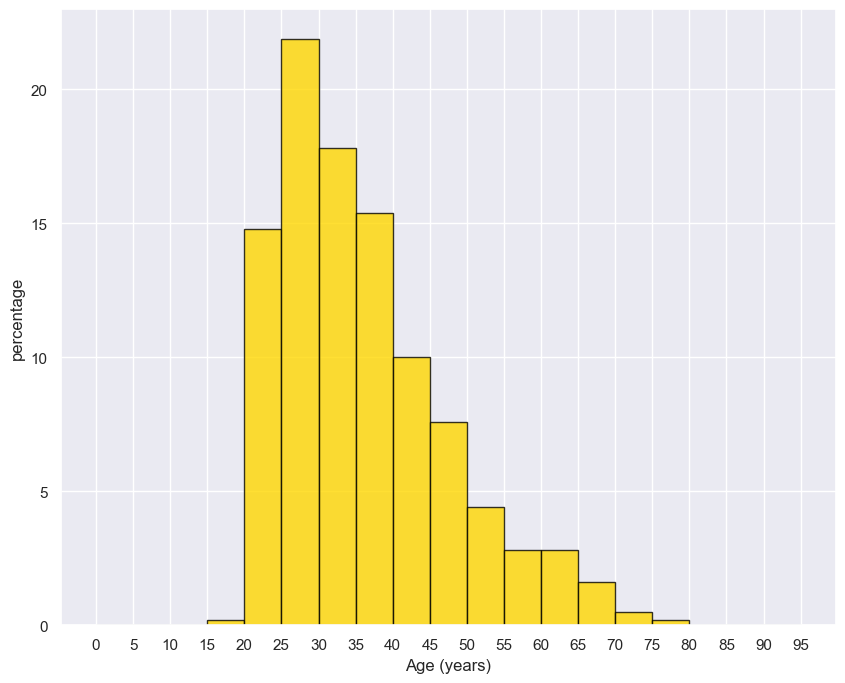

In [65]:
var = 'Age (years)'
x = data1[var]
bins = np.arange(0, 100, 5.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='gold',
         ec='black',weights=np.zeros_like(x) + 100. / x.size)

plt.xlabel(var)
plt.ylabel('percentage')
plt.xticks(bins)
plt.show()

# fig.savefig(var+".pdf", bbox_inches='tight')

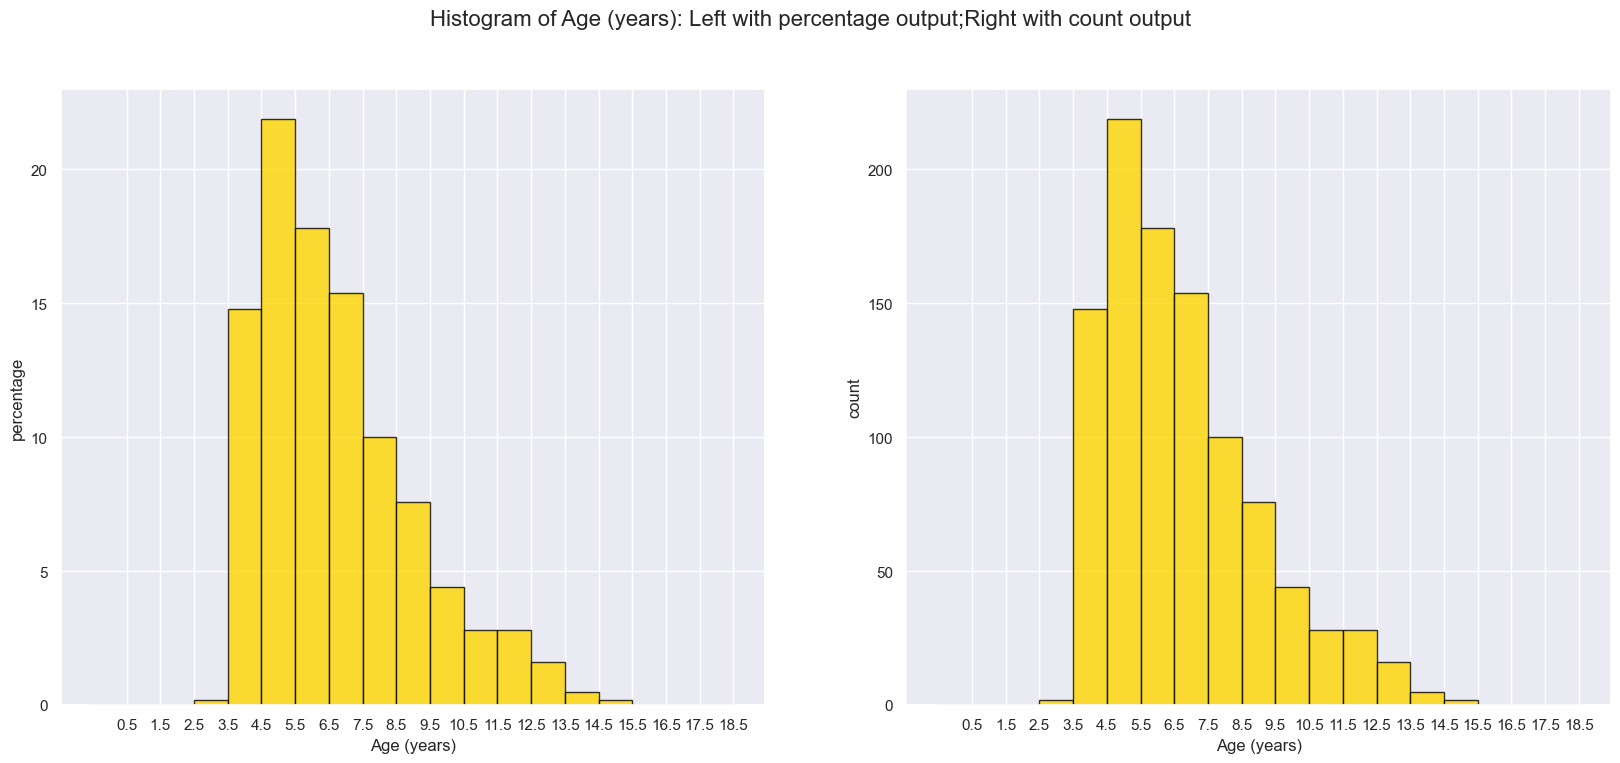

In [66]:
var = 'Age (years)'
x = data1[var]
bins = np.arange(0, 100, 5.0)


########################################################################
hist, bin_edges = np.histogram(x,bins,
                               weights=np.zeros_like(x) + 100. / x.size) 
# make the histogram
 
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black', color='gold')
# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)]) 
# Set the xticklabels to a string that tells us what the bin edges were
labels =['{}'.format(int(bins[i+1])) for i,j in enumerate(hist)]
labels.insert(0,'0')
# ax.set_xticklabels(labels)
plt.xlabel(var)
plt.ylabel('percentage')

########################################################################

hist, bin_edges = np.histogram(x,bins) # make the histogram

ax = fig.add_subplot(1, 2, 2)
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black', color='gold')
 
# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
 
# Set the xticklabels to a string that tells us what the bin edges were
labels =['{}'.format(int(bins[i+1])) for i,j in enumerate(hist)]
labels.insert(0,'0')
# ax.set_xticklabels(labels)
plt.xlabel(var)
plt.ylabel('count')
plt.suptitle('Histogram of {}: Left with percentage output;Right with count output'
             .format(var), size=16)
plt.show()

# fig.savefig(var+".pdf", bbox_inches='tight')

Sometimes, some people will ask you to plot the unequal width (invalid argument for histogram) of the bars. You can still achieve it by the following trick.



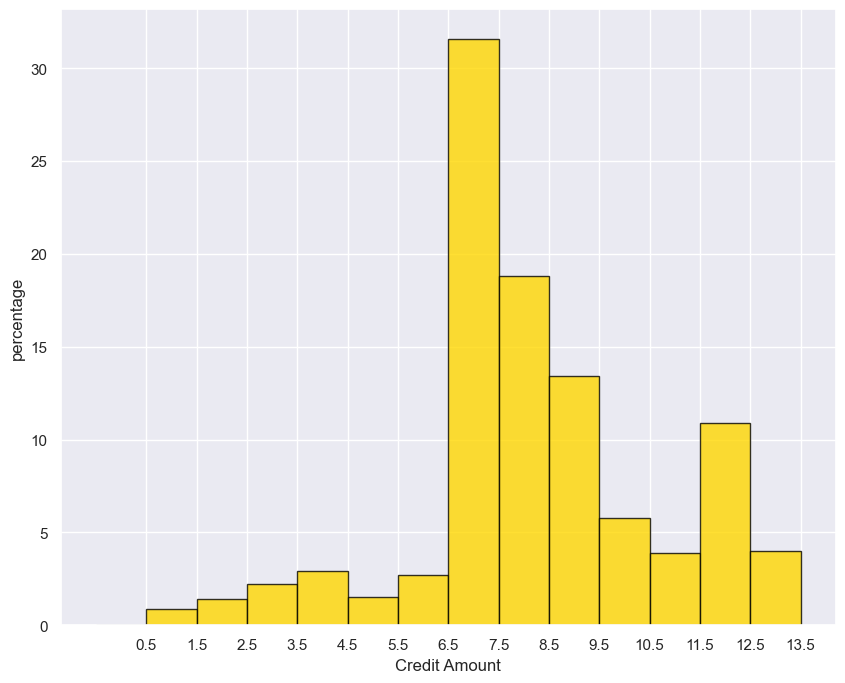

In [67]:
var = 'Credit Amount'
plot_data = df.select(var).toPandas()
x= plot_data[var]

bins =[0,200,400,600,700,800,900,1000,2000,3000,4000,5000,6000,10000,25000]

hist, bin_edges = np.histogram(x,bins,weights=np.zeros_like(x) + 100. / x.size) # make the histogram

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black',color = 'gold')

# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
#labels =['{}k'.format(int(bins[i+1]/1000)) for i,j in enumerate(hist)]
labels =['{}'.format(bins[i+1]) for i,j in enumerate(hist)]
labels.insert(0,'0')
# ax.set_xticklabels(labels)
#plt.text(-0.6, -1.4,'0')
plt.xlabel(var)
plt.ylabel('percentage')
plt.show();


### Box plot and violin plot
Note that although violin plots are closely related to Tukey’s (1977) box plots, the violin plot can show more information than box plot. When we perform an exploratory analysis, nothing about the samples could be known. So the distribution of the samples can not be assumed to a normal distribution and usually when you get a big data, the normal distribution will show some out liars in box plot.

However, the violin plots are potentially misleading for smaller sample sizes, where the density plots can appear to show interesting features (and group-differences therein) even when produced for standard normal data. Some poster suggested the sample size should larger that 250. The sample sizes (e.g. n>250 or ideally even larger), where the kernel density plots provide a reasonably accurate representation of the distributions, potentially showing nuances such as bimodality or other forms of non-normality that would be invisible or less clear in box plots. More details can be found in [A simple comparison of box plots and violin plots](https://figshare.com/articles/figure/A_simple_comparison_of_box_plots_and_violin_plots/1544525).

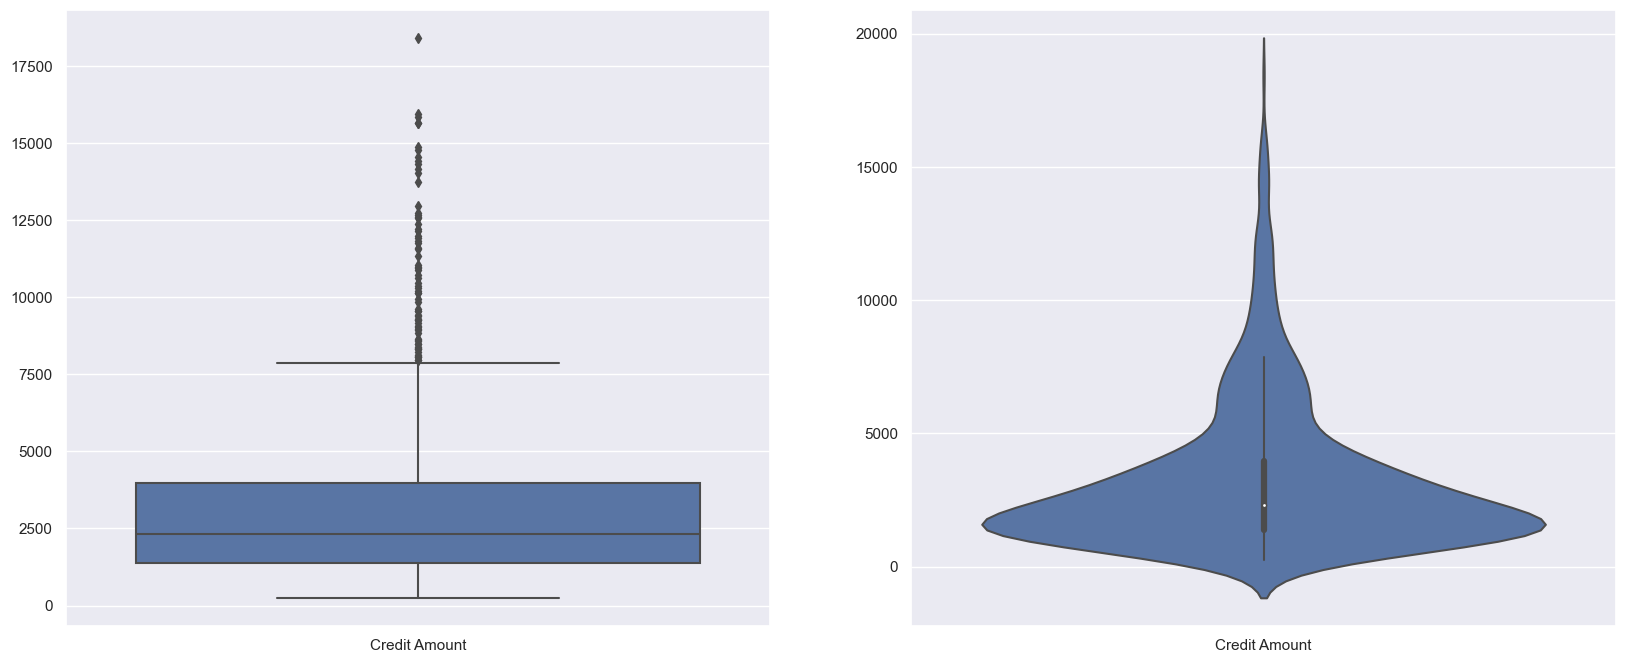

In [68]:
x = df.select(var).toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

## Categorical Variables
Compared with the numerical variables, the categorical variables are much more easier to do the exploration.

### Frequency table


In [69]:
df.columns

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [70]:
from pyspark.sql import functions as F
from pyspark.sql.functions import rank,sum,col
from pyspark.sql import Window

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
# withColumn('Percent %',F.format_string("%5.0f%%\n",col('Credit_num')*100/col('total'))).\
tab = df.select(['Age (years)','Credit Amount']).\
   groupBy('Age (years)').\
   agg(F.count('Credit Amount').alias('Credit_num'),
       F.mean('Credit Amount').alias('Credit_avg'),
       F.min('Credit Amount').alias('Credit_min'),
       F.max('Credit Amount').alias('Credit_max')).\
   withColumn('total',sum(col('Credit_num')).over(window)).\
   withColumn('Percent',col('Credit_num')*100/col('total')).\
   drop(col('total'))



In [71]:
tab.show()

22/10/05 22:14:06 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-----------+----------+------------------+----------+----------+-------+
|Age (years)|Credit_num|        Credit_avg|Credit_min|Credit_max|Percent|
+-----------+----------+------------------+----------+----------+-------+
|         31|        38|3671.6315789473683|       929|      9857|    3.8|
|         65|         5|            1718.6|       571|      3394|    0.5|
|         53|         7| 4770.428571428572|       795|      7865|    0.7|
|         34|        33| 3387.242424242424|      1337|     11998|    3.3|
|         28|        43|2934.6976744186045|       484|      9572|    4.3|
|         26|        49| 2921.673469387755|       590|     10974|    4.9|
|         27|        50|           3436.76|       343|     14027|    5.0|
|         44|        17| 4236.764705882353|       760|     12579|    1.7|
|         22|        27|2109.5925925925926|       276|      5951|    2.7|
|         47|        17| 3078.705882352941|       713|     12612|    1.7|
|         52|         9| 2063.22222222

### Pie plot

In [72]:
def age_condition(x):
    if pd.isnull(x):
        return "missing"
    elif x <25:
        return "<25"
    elif 25 <= x <= 34:
        return "25-34"
    elif 35 <= x <= 44:
        return "35-44" 
    elif 45 <= x <= 54:
        return "45-54" 
    elif 55 <= x <= 64:
        return "55-64"     
    else:
        return "65+"

In [73]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType, DoubleType

age_udf = udf(lambda x: age_condition(x), StringType())

In [74]:
df = df.withColumn("age_class", age_udf("Age (years)"))

In [75]:
df.select(['age_class','Age (years)']).show(3)

+---------+-----------+
|age_class|Age (years)|
+---------+-----------+
|      <25|         21|
|    35-44|         36|
|      <25|         23|
+---------+-----------+
only showing top 3 rows



In [76]:
df.select(['age_class','Credit Amount']).\
   groupBy('age_class').count().show()

+---------+-----+
|age_class|count|
+---------+-----+
|    45-54|  120|
|      <25|  150|
|    55-64|   56|
|    35-44|  254|
|    25-34|  397|
|      65+|   23|
+---------+-----+



In [77]:
df.stat.crosstab("age_class", "Occupation").show()

+--------------------+---+---+---+---+
|age_class_Occupation|  1|  2|  3|  4|
+--------------------+---+---+---+---+
|                 <25|  4| 34|108|  4|
|               55-64|  1| 15| 31|  9|
|               25-34|  7| 61|269| 60|
|               35-44|  4| 58|143| 49|
|                 65+|  5|  3|  6|  9|
|               45-54|  1| 29| 73| 17|
+--------------------+---+---+---+---+



In [78]:
from pyspark.sql import functions as F
from pyspark.sql.functions import rank,sum,col
from pyspark.sql import Window

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
# withColumn('Percent %',F.format_string("%5.0f%%\n",col('Credit_num')*100/col('total'))).\
tab = df.select(['age_class','Credit Amount']).\
   groupBy('age_class').\
   agg(F.count('Credit Amount').alias('Credit_num'),
       F.mean('Credit Amount').alias('Credit_avg'),
       F.min('Credit Amount').alias('Credit_min'),
       F.max('Credit Amount').alias('Credit_max')).\
   withColumn('total',sum(col('Credit_num')).over(window)).\
   withColumn('Percent',col('Credit_num')*100/col('total')).\
   drop(col('total'))

In [79]:
tab.show()

22/10/05 22:14:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+---------+----------+------------------+----------+----------+-------+
|age_class|Credit_num|        Credit_avg|Credit_min|Credit_max|Percent|
+---------+----------+------------------+----------+----------+-------+
|    45-54|       120|3183.0666666666666|       338|     12612|   12.0|
|      <25|       150| 2970.733333333333|       276|     15672|   15.0|
|    55-64|        56| 3493.660714285714|       385|     15945|    5.6|
|    35-44|       254| 3403.771653543307|       250|     15857|   25.4|
|    25-34|       397| 3298.823677581864|       343|     18424|   39.7|
|      65+|        23|3210.1739130434785|       571|     14896|    2.3|
+---------+----------+------------------+----------+----------+-------+



In [80]:
plot_data = tab.toPandas() 
plot_data.sort_values('age_class')

22/10/05 22:14:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


,age_class,Credit_num,Credit_avg,Credit_min,Credit_max,Percent
4,25-34,397,3298.823678,343,18424,39.7
3,35-44,254,3403.771654,250,15857,25.4
0,45-54,120,3183.066667,338,12612,12.0
2,55-64,56,3493.660714,385,15945,5.6
5,65+,23,3210.173913,571,14896,2.3
1,<25,150,2970.733333,276,15672,15.0


In [81]:
custom_dict = {'<25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65+': 5}

In [82]:
plot_data['index']= plot_data['age_class'].replace(custom_dict)

In [83]:
plot_data.sort_values('index')

,age_class,Credit_num,Credit_avg,Credit_min,Credit_max,Percent,index
1,<25,150,2970.733333,276,15672,15.0,0
4,25-34,397,3298.823678,343,18424,39.7,1
3,35-44,254,3403.771654,250,15857,25.4,2
0,45-54,120,3183.066667,338,12612,12.0,3
2,55-64,56,3493.660714,385,15945,5.6,4
5,65+,23,3210.173913,571,14896,2.3,5


In [84]:
plot_data = plot_data.sort_values('index')

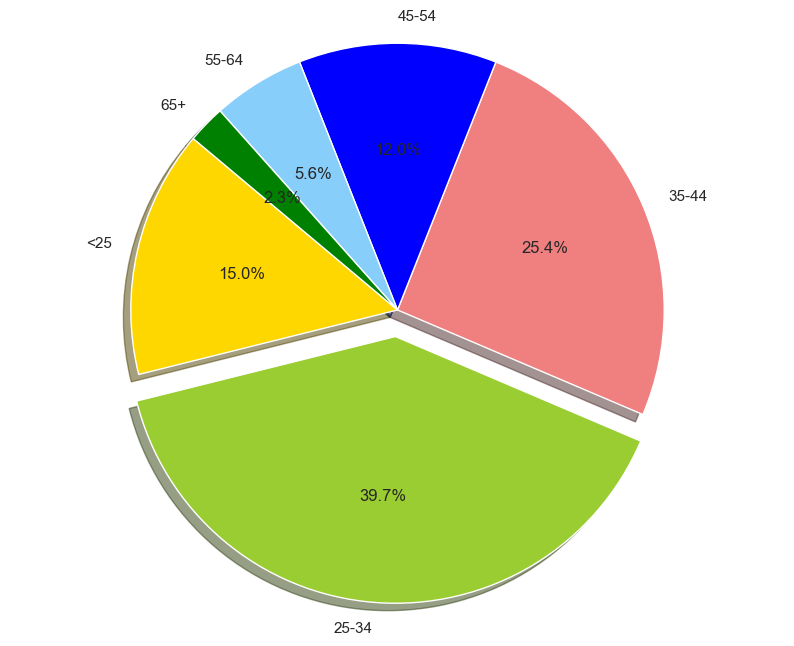

In [85]:
# Data to plot
labels = plot_data.age_class
sizes =  plot_data.Percent
colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red']
explode = (0, 0.1, 0, 0,0,0)  # explode 1st slice
 
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

###  Bar plot

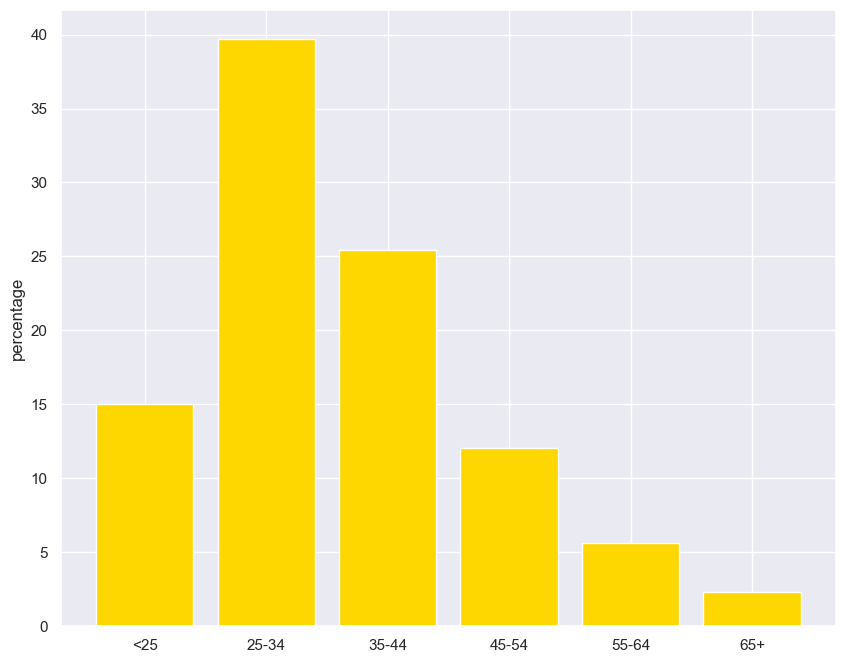

In [86]:
labels = plot_data.age_class
missing = plot_data.Percent
ind = [x for x, _ in enumerate(labels)]

plt.figure(figsize=(10,8))
plt.bar(ind, missing, width=0.8, label='missing', color='gold')

plt.xticks(ind, labels)
plt.ylabel("percentage")

plt.show()

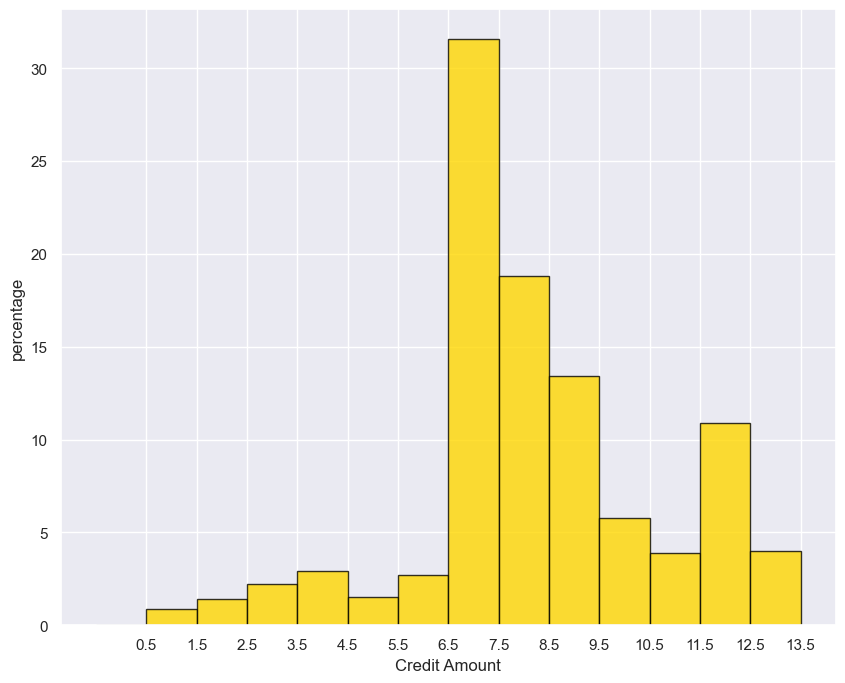

In [89]:
# prepare for the plot data

var = 'Credit Amount'
plot_data = df.select(var).toPandas()
x= plot_data[var]

bins =[0,200,400,600,700,800,900,1000,2000,3000,4000,5000,6000,10000,25000] 

hist, bin_edges = np.histogram(x,bins,weights=np.zeros_like(x) + 100. / x.size) # make the histogram
 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black',color = 'gold')
 
# # Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
 
# Set the xticklabels to a string that tells us what the bin edges were
#labels =['{}k'.format(int(bins[i+1]/1000)) for i,j in enumerate(hist)]
labels =['{}'.format(bins[i+1]) for i,j in enumerate(hist)]
labels.insert(0,'0')
# ax.set_xticklabels(labels)
#plt.text(-0.6, -1.4,'0')
plt.xlabel(var)
plt.ylabel('percentage')
plt.show()

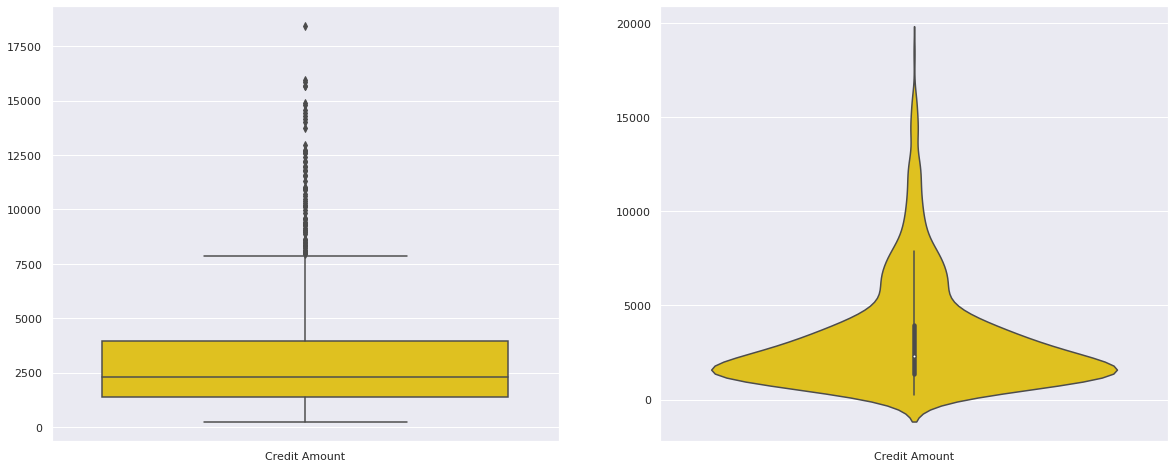

In [ ]:
x = df.select(var).toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x,color='gold')

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x,color='gold')

## Multivariate Analysis

### Correlation matrix

In [90]:
corr_data = df.select(num_cols)

In [91]:
from pyspark.mllib.stat import Statistics
import pandas as pd

corr_data = df.select(num_cols)

col_names = corr_data.columns
features = corr_data.rdd.map(lambda row: row[0:])
corr_mat=Statistics.corr(features, method="pearson")
corr_df = pd.DataFrame(corr_mat)
corr_df.index, corr_df.columns = col_names, col_names

print(corr_df.to_string())

                  Account Balance  No of dependents
Account Balance          1.000000         -0.014145
No of dependents        -0.014145          1.000000


22/10/05 22:14:38 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/10/05 22:14:38 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [92]:
spark.createDataFrame(corr_df).show()

+--------------------+--------------------+
|     Account Balance|    No of dependents|
+--------------------+--------------------+
|                 1.0|-0.01414542650320882|
|-0.01414542650320882|                 1.0|
+--------------------+--------------------+



In [93]:
print(corr_df.to_string())

                  Account Balance  No of dependents
Account Balance          1.000000         -0.014145
No of dependents        -0.014145          1.000000


### Scatter Plot

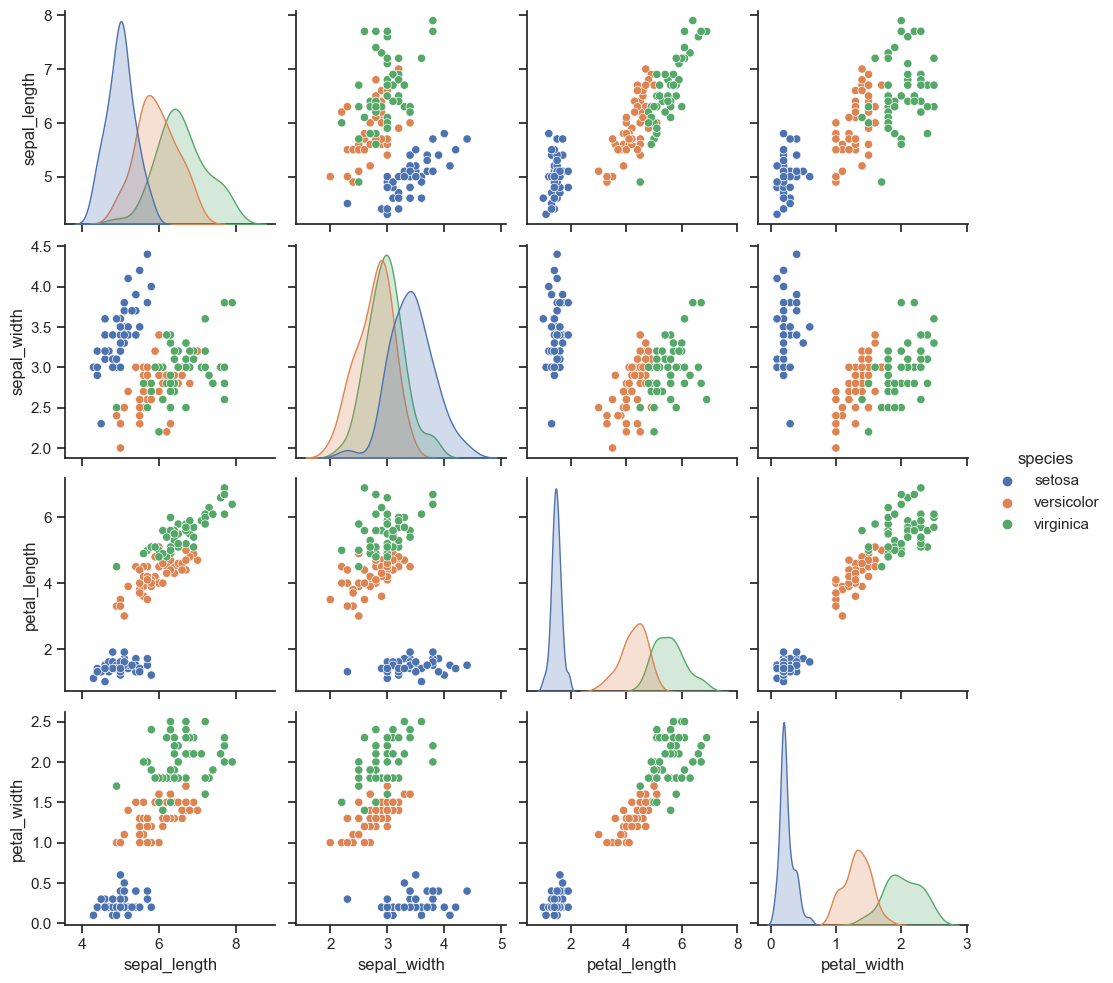

In [94]:

import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")
plt.show()

## Categorical V.S. Categorical
### Pearson’s Chi-squared test

In [95]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest

data = [(0.0, Vectors.dense(0.5, 10.0)),
        (0.0, Vectors.dense(1.5, 20.0)),
        (1.0, Vectors.dense(1.5, 30.0)),
        (0.0, Vectors.dense(3.5, 30.0)),
        (0.0, Vectors.dense(3.5, 40.0)),
        (1.0, Vectors.dense(3.5, 40.0))]
df = spark.createDataFrame(data, ["label", "features"])

r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.6872892787909721,0.6822703303362126]
degreesOfFreedom: [2, 3]
statistics: [0.75,1.5]


### Cross table

In [100]:
data_ = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').load("./data/GermanCredit.csv",header=True);

data_.columns
data_.columns

['Creditability',
 'Account Balance',
 'Duration of Credit (month)',
 'Payment Status of Previous Credit',
 'Purpose',
 'Credit Amount',
 'Value Savings/Stocks',
 'Length of current employment',
 'Instalment per cent',
 'Sex & Marital Status',
 'Guarantors',
 'Duration in Current address',
 'Most valuable available asset',
 'Age (years)',
 'Concurrent Credits',
 'Type of apartment',
 'No of Credits at this Bank',
 'Occupation',
 'No of dependents',
 'Telephone',
 'Foreign Worker']

In [101]:

data_.stat.crosstab("Age (years)", "Occupation").show()

+----------------------+---+---+---+---+
|Age (years)_Occupation|  1|  2|  3|  4|
+----------------------+---+---+---+---+
|                    56|  0|  0|  3|  0|
|                    42|  0|  3| 14|  5|
|                    24|  1| 12| 31|  1|
|                    37|  0|  8| 19|  2|
|                    25|  1|  8| 30|  1|
|                    52|  0|  2|  5|  2|
|                    20|  0|  1| 12|  1|
|                    46|  0|  3| 12|  3|
|                    57|  0|  5|  2|  2|
|                    29|  2|  5| 24|  6|
|                    61|  0|  3|  3|  1|
|                    74|  1|  1|  0|  2|
|                    60|  0|  1|  3|  2|
|                    28|  0|  6| 31|  6|
|                    38|  1|  4| 13|  6|
|                    70|  0|  0|  0|  1|
|                    21|  0|  3| 11|  0|
|                    33|  0|  6| 24|  3|
|                    65|  2|  0|  3|  0|
|                    53|  0|  0|  5|  2|
+----------------------+---+---+---+---+
only showing top

### Stacked plot

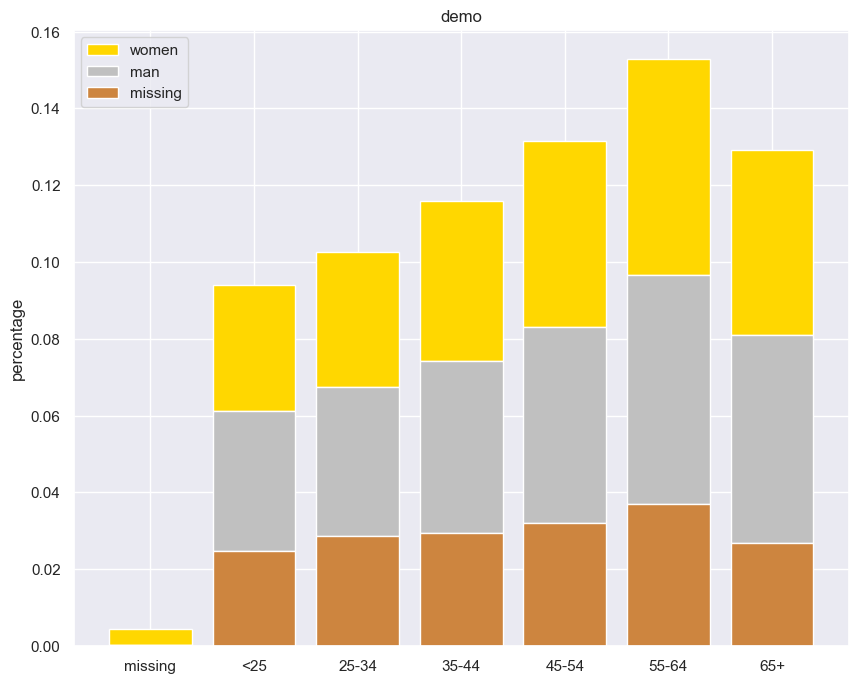

In [87]:
labels = ['missing', '<25', '25-34', '35-44', '45-54','55-64','65+']
missing = np.array([0.000095, 0.024830, 0.028665, 0.029477, 0.031918,0.037073,0.026699])
man = np.array([0.000147, 0.036311, 0.038684, 0.044761, 0.051269, 0.059542, 0.054259])
women = np.array([0.004035, 0.032935, 0.035351, 0.041778, 0.048437, 0.056236,0.048091])
ind = [x for x, _ in enumerate(labels)]

plt.figure(figsize=(10,8))
plt.bar(ind, women, width=0.8, label='women', color='gold', bottom=man+missing)
plt.bar(ind, man, width=0.8, label='man', color='silver', bottom=missing)
plt.bar(ind, missing, width=0.8, label='missing', color='#CD853F')

plt.xticks(ind, labels)
plt.ylabel("percentage")
plt.legend(loc="upper left")
plt.title("demo")

plt.show()

## Numerical V.S. Categorical
### Line Chart with Error Bars

In [103]:
tips

NameError: name 'tips' is not defined

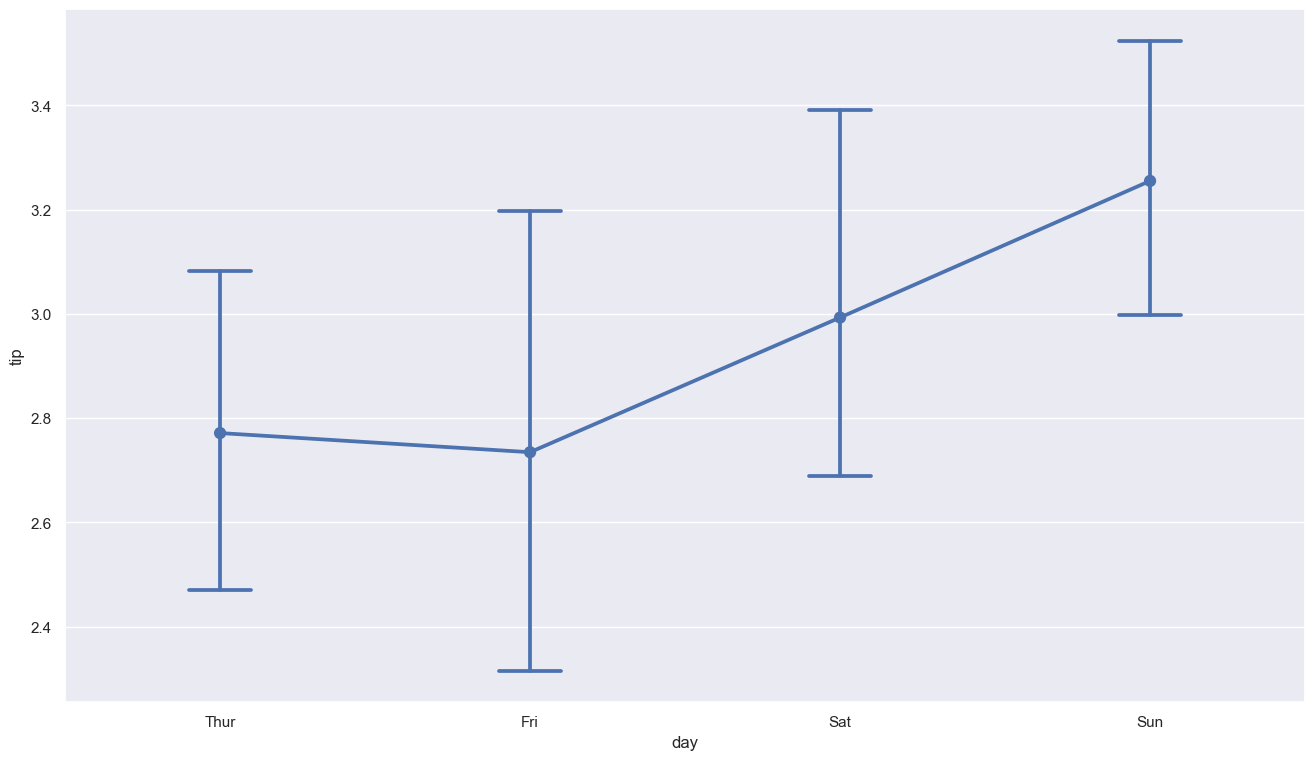

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
tips = sns.load_dataset("tips")

plt.rcParams['figure.figsize'] =(16,9)
plt.style.use('ggplot')
sns.set()

ax = sns.pointplot(x="day", y="tip", data=tips, capsize=.2)
plt.show()

### Combination Chart

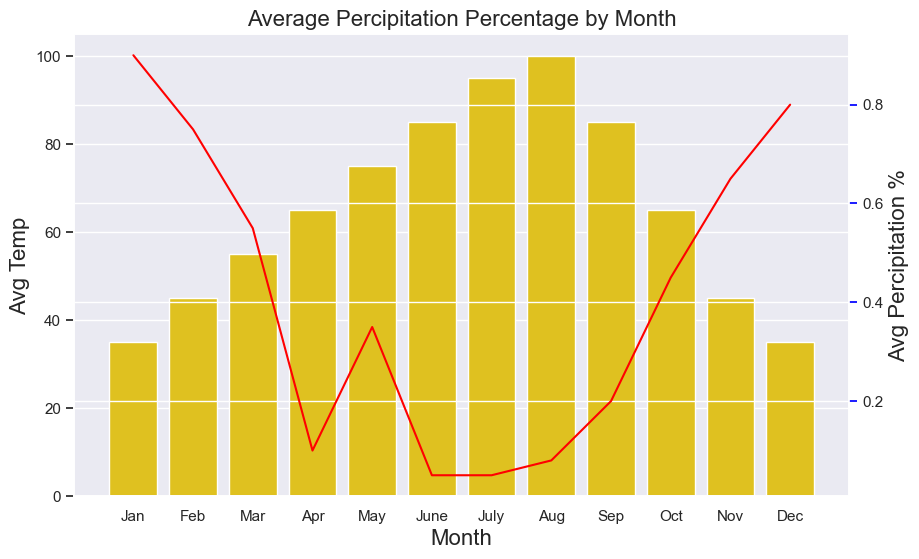

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

plt.rcParams['figure.figsize'] =(16,9)
plt.style.use('ggplot')
sns.set()


#create list of months
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
         'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#create list for made up average temperatures
Avg_Temp = [35, 45, 55, 65, 75, 85, 95, 100, 85, 65, 45, 35]
#create list for made up average percipitation %
Avg_Percipitation_Perc = [.90, .75, .55, .10, .35, .05, .05, .08, .20, .45, .65, .80]
#assign lists to a value
data = {'Month': Month, 'Avg_Temp': Avg_Temp, 'Avg_Percipitation_Perc': Avg_Percipitation_Perc}
#convert dictionary to a dataframe
df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Average Percipitation Percentage by Month', fontsize=16)
ax1.tick_params(axis='y')

ax2 = sns.barplot(x='Month', y='Avg_Temp', data = df, color=  'gold')
ax2 = ax1.twinx()
ax2 = sns.lineplot(x='Month', y='Avg_Percipitation_Perc', data = df, sort=False, color='red')

ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16)

ax2.tick_params(axis='y',  color=  'blue')
ax2.set_ylabel('Avg Percipitation %', fontsize=16)
plt.show()